# 直方图计算与可视化

1. 函数定义
     - 三个重载函数，除了参数的类型不同，参数的作用都一样。

```C++
void 	cv::calcHist (
    const Mat *images, 
    int nimages, 
    const int *channels, 
    InputArray mask, 
    OutputArray hist, 
    int dims, 
    const int *histSize, 
    const float **ranges, 
    bool uniform=true, 
    bool accumulate=false)
 
void 	cv::calcHist (
    const Mat *images, 
    int nimages, 
    const int *channels, 
    InputArray mask, 
    SparseMat &hist, 
    int dims, 
    const int *histSize, 
    const float **ranges, 
    bool uniform=true, 
    bool accumulate=false)
 
void 	cv::calcHist (
    InputArrayOfArrays images, 
    const std::vector< int > &channels, 
    InputArray mask, 
    OutputArray hist, 
    const std::vector< int > &histSize, 
    const std::vector< float > &ranges, 
    bool accumulate=false)
```

2. 多维统计常识理解

- 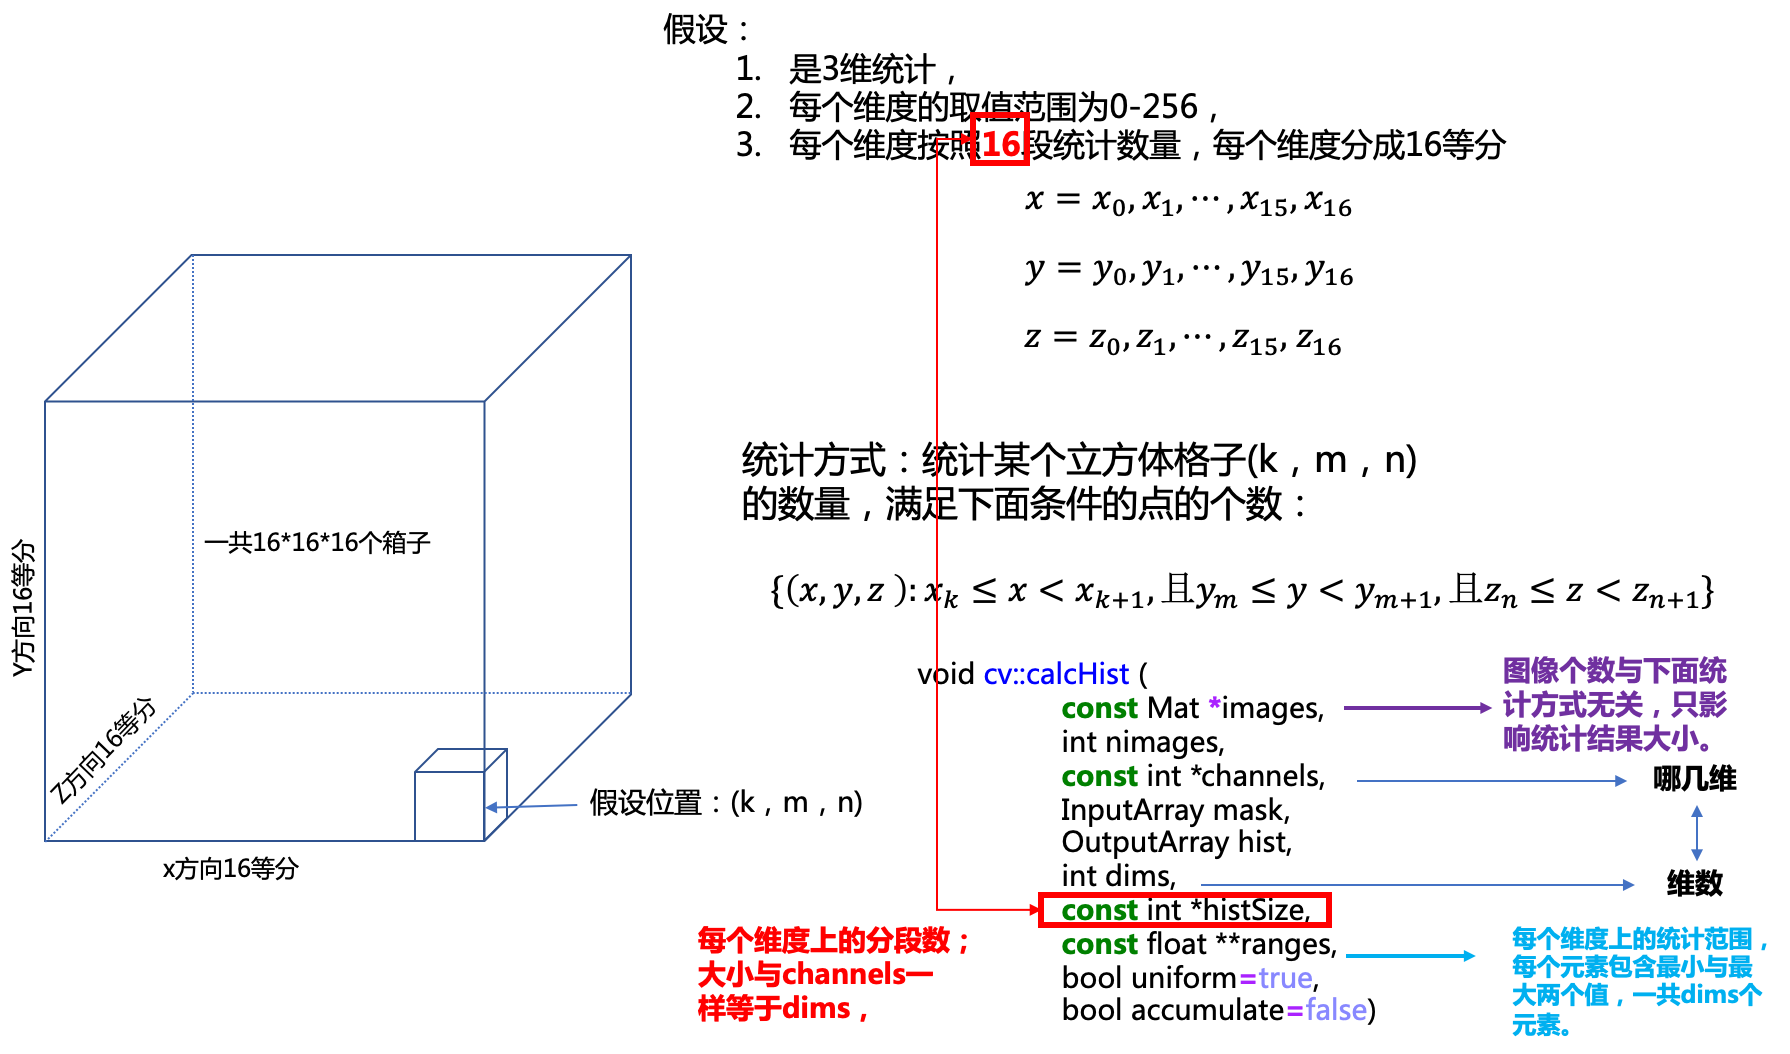

3. 参数说明，以第一个重载函数为例说明：
    - `const Mat *images`
        - 需要计算的图像数组（多个图像，通道数可以不同，但是深度必须相同）。
        - 统计图像的数量与下面统计方式无关，1，2，3副图像只对统计结果的数量多少有影响。
    - `int nimages`
        - 指定图像数组中的图像个数。
    - `const int *channels`
        - 指定每个图像对应的通道数。这个参数的通道个数决定了统计维度，这个参数的格式由下面dims参数指定。不能少于dims指定个数，否则数组越界产生段错误。
        - 例子：`int  channels[] = {0, 1, 2}`，统计三个通道，这样统计维数dims就是3
    - `InputArray mask`
        - 遮罩，用来排除不需要计数的像素值。如果为empty表示全部统计。
    - `OutputArray hist`
        - 输出计算好的直方数据。返回使用Mat格式，返回的size维度与dims一样。
    - `int dims`
        - 需要计数的输出种类（取值在0与CV_MAX_DIMS之间），目前OpenCV的版本CV_MAX_DIMS=32。
            - 指定channels元素的格式，同时决定了统计的维度，3维就是一个落在3维立体范围的点的个数。2维就是落在矩阵内的点的格式。1为就是某个数据段内的点的个数。
    - `const int *histSize`
        - 每个维度的直方大小。统计分段数，比如256分成16端，最后就产生16个统计结果，每个对应每个段内的点的数量。
    - `const float **ranges`
        - 每个维度需要计数的范围。指定需要统计的最小与最大值，统计像素就是0-256，指定0-258效果就不一样，这样最后一段的点数量会少。
    - `bool uniform=true`
        - bin箱子的大小是否一样。
    - `bool accumulate=false`
        - 是否累加；不累加就会先清空输出数组。

4. 说明：
    - 多维统计一般比较抽象。常用的对图像按照RGB分开统计，或者把颜色转换为HSV格式统计色彩亮度与饱和度。

5. 返回值：
    - 返回的数组的depth类型是5，所以获取数据使用23位小数：float类型；
        - `#define 	CV_32F   5`

6. 多维统计的例子：
    - 把颜色按照RGB分成`15*15*15`个颜色格子，统计图像像素中落在颜色格子中的数量。

```C++
void ImageProc::histogram(){
    cv::Mat imgs[] = {m_src, m_src};   // 把图像统计两次
    cv::Mat out;   // 统计结果存放。
    
    int channels[] = {0, 1, 2};       // 按照0，1，2这3个通道进行3维统计。
    
    int histSizes[] = {15, 15, 15};    // 每个维度分成15段统计（）这样行程15*15*15个格子，统计的就是落在格子内点的数量
    float r[] = {0, 255};                // 第1维的统计值范围
    float g[] = {0, 255};               // 第2维的统计值范围
    float b[] = {0, 255};               // 第3维的统计值范围
    
    const float* ranges[] =  {r, g, b};    // 参数需要二维数组，所以吧统计范围组合成2维数组，不能直接组成二维数组，C++没有类似java的语法。
    
    cv::calcHist(
        imgs,         // 被统计的图像；
        2,              // 被统计的图像数量；
        channels,       // 需要统计的推向的通道列表
        cv::Mat(),      // 不需要统计的值；
        out,            // 统计输出结果
        3,              // 每个图像需要统计的通道数；   channels，ranges，histSizes的长度都必须等于dims。
        histSizes,      // bin箱子个数（统计的分段个数）
        ranges,         // 统计的像素值范围
        true,           // 是否归一化处理
        false           // 是否累加（统计前是否清零）
    );
    // 输出行，列与是否为空！维数超过2，返回的行列是-1。 rows与cols是提供给矩阵数组的快捷访问方式。cv::Mat可以是多维数组。
    std::cout << out.rows << "," << out.cols << "," << out.empty()<< std::endl;
    std::cout << out.dims << std::endl; 
    std::cout << out.size[0] << "," << out.size[1] << "," << out.size[2] << std::endl;   // 返回的统计数据是3维15*15*15个结果。
    // 结果太多，就不可视化输出了。
}
```

7. 1 维统计

```C++
void ImageProc::histogram(){
    cv::Mat out;
    int channels[] = {0};     // 0 通道实际是B颜色的统计。
    int histSizes[] = {256};
    float r[] = {0, 256};
    const float* ranges[] =  {r};
    int dims = 1;

    cv::calcHist(
        &m_src,         // 被统计的图像；
        1,              // 被统计的图像数量；
        channels,       // 需要统计的推向的通道列表
        cv::Mat(),      // 不需要统计的值；
        out,            // 统计输出结果
        dims,           // 每个图像需要统计的通道数；
        histSizes,      // bin箱子个数（统计的分段个数）
        ranges,         // 统计的像素值范围
        true,           // 是否归一化处理
        false           // 是否累加（统计前是否清零）
    );
    // 返回的是一维数组(输出的是二维，是一个列向量矩阵15 * 1)
    // std::cout << out.rows << "," << out.cols << "," << out.empty()<< std::endl;
    // std::cout << out.dims << std::endl; 
    // std::cout << out.size[0] << "," << out.size[1] << std::endl;
    // 把数据绘制成直方图（或者曲线图）
    // std::cout << out.depth() << "," << out.channels() << std::endl;
    // for(int i = 0; i < out.rows; i++){
    //     std::cout<< out.at<float>(i) << std::endl;
    // }
    // 为了方便绘制，先归一化(归一到一个指定的范围)，在放大绘制，根据显示区域来决定
    // 图像宽356,高270
    m_src_hist = cv::Mat(270, 356, CV_8UC3, cv::Vec3b(255, 255, 255)); // 背景白色
    // 归一化到 0-270之间，然后绘制直方图（绘制直线代替矩形）。
    cv::normalize(
        out, out,           // 输入与输出
        0,                  // 最小值
        270,                // 最大 
        cv::NORM_MINMAX,    // 使用最小与最大归一化
        -1,         // 输出类型 
        cv::Mat()   // 遮罩
    ); 
    // 循环绘制图像（等分）
    int rows = out.rows; 
    for(int i = 0; i < rows; i++){
        float v = out.at<float>(i);
        // 计算绘制位置
        int x = int(i * 356.0 * 100 / rows) / 100;   // 放大100被，其中最后两位是精度
        int y = int(v * 100 ) / 100;
        cv::line(
            m_src_hist,
            cv::Point(x, y),                    // 直线端点1
            cv::Point(x, 0),                    // 直线端点2
            cv::Scalar(0.0, 0.0, 255.0),        // 颜色
            1,                                  // 粗细
            cv::LINE_8,                         // 线条绘制类型
            0                               // 绘制精度
        );
    }
    // 直方图反转下，符合一般坐标系习惯
    cv::flip(m_src_hist,m_src_hist,0);  // 最后参数取0（按照x翻转）或者1（按照y翻转）
}
```

- 下面效果只是统计了蓝色通道的直方数据。

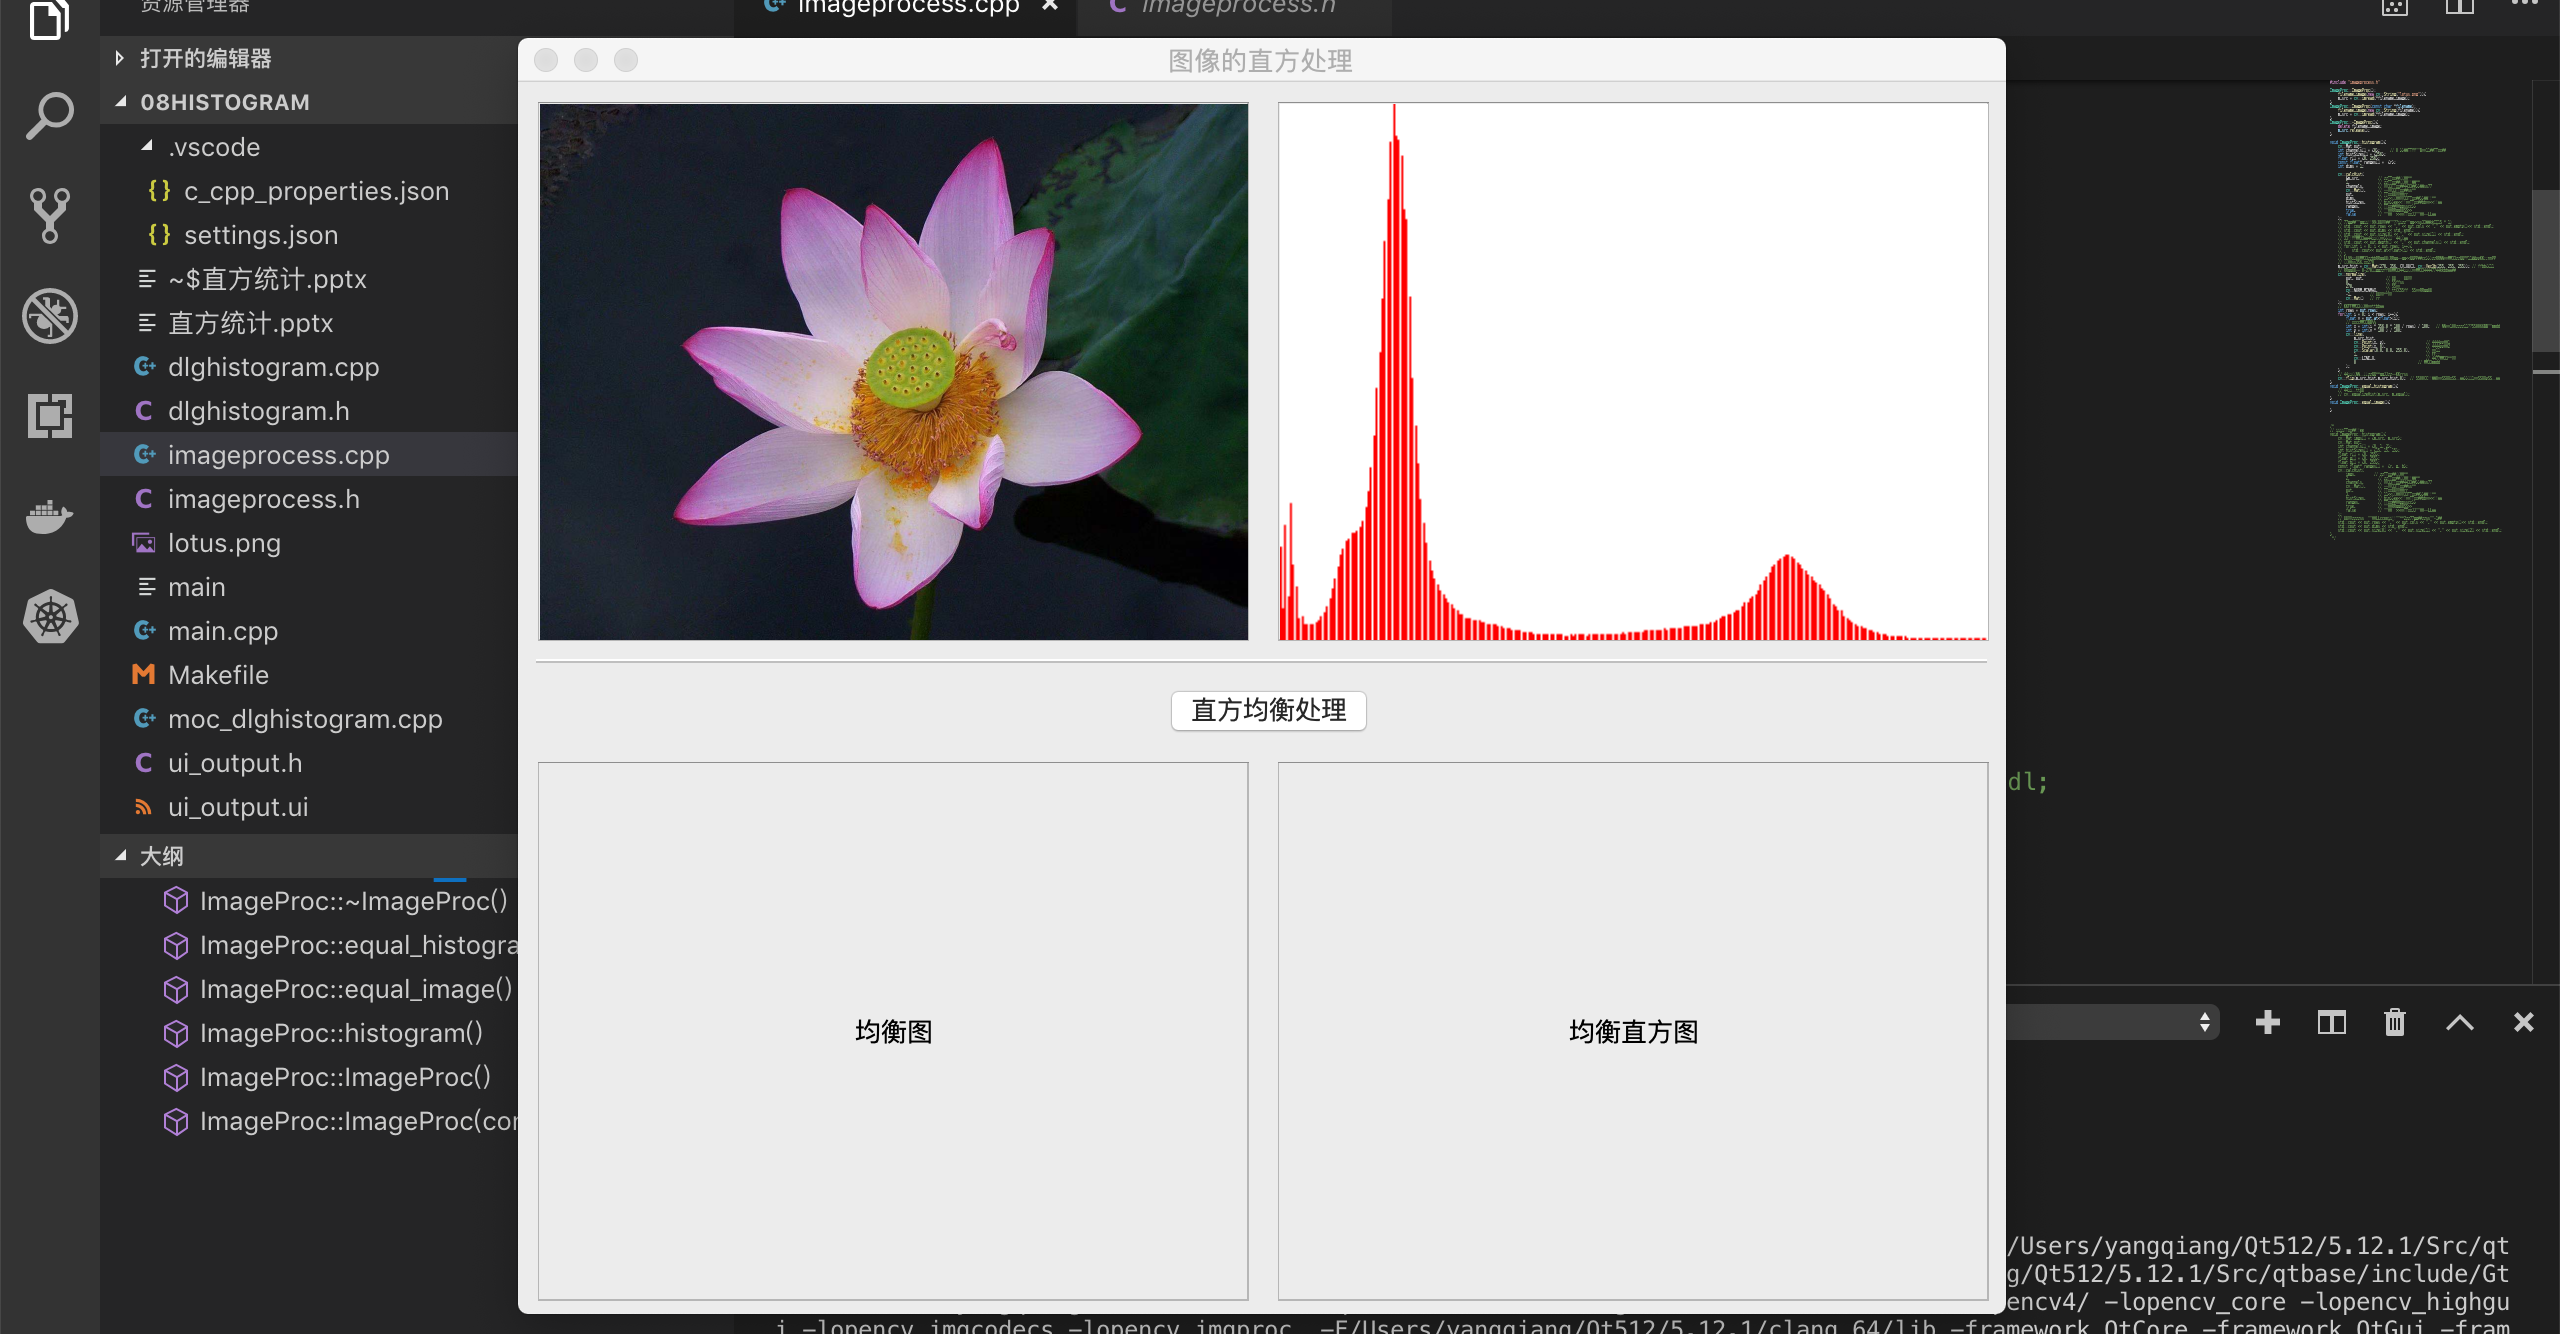

# 直方均衡化化处理（同等化处理）

- 直方同等化只支持灰度图，就是对矩阵Mat的类型必须是：8UC1类型（8位单通道类型）

1. 函数定义：

```C++
void cv::equalizeHist	(	
    InputArray 	src,                // 输入图像
    OutputArray 	dst           // 直方同等化图像
)	
```

2. 代码实现：

```C++
void ImageProc::equal_image(){
    // 直方同等化(因为只支持CV_8UC1，所以需要转换为维灰度图)
    cv::Mat m_src_gray, m_equal_gray;
    cv::cvtColor(m_src, m_src_gray, cv::COLOR_BGR2GRAY); // 转换为灰度图
    // 替换原图像为灰度图
    m_src = m_src_gray;  // 记得在调用处更新下显示
    cv::equalizeHist(m_src_gray, m_equal_gray);

    // 在把弧度图转换为3通道RGB
    cv::cvtColor(m_equal_gray, m_equal, cv::COLOR_GRAY2BGR);
}

```

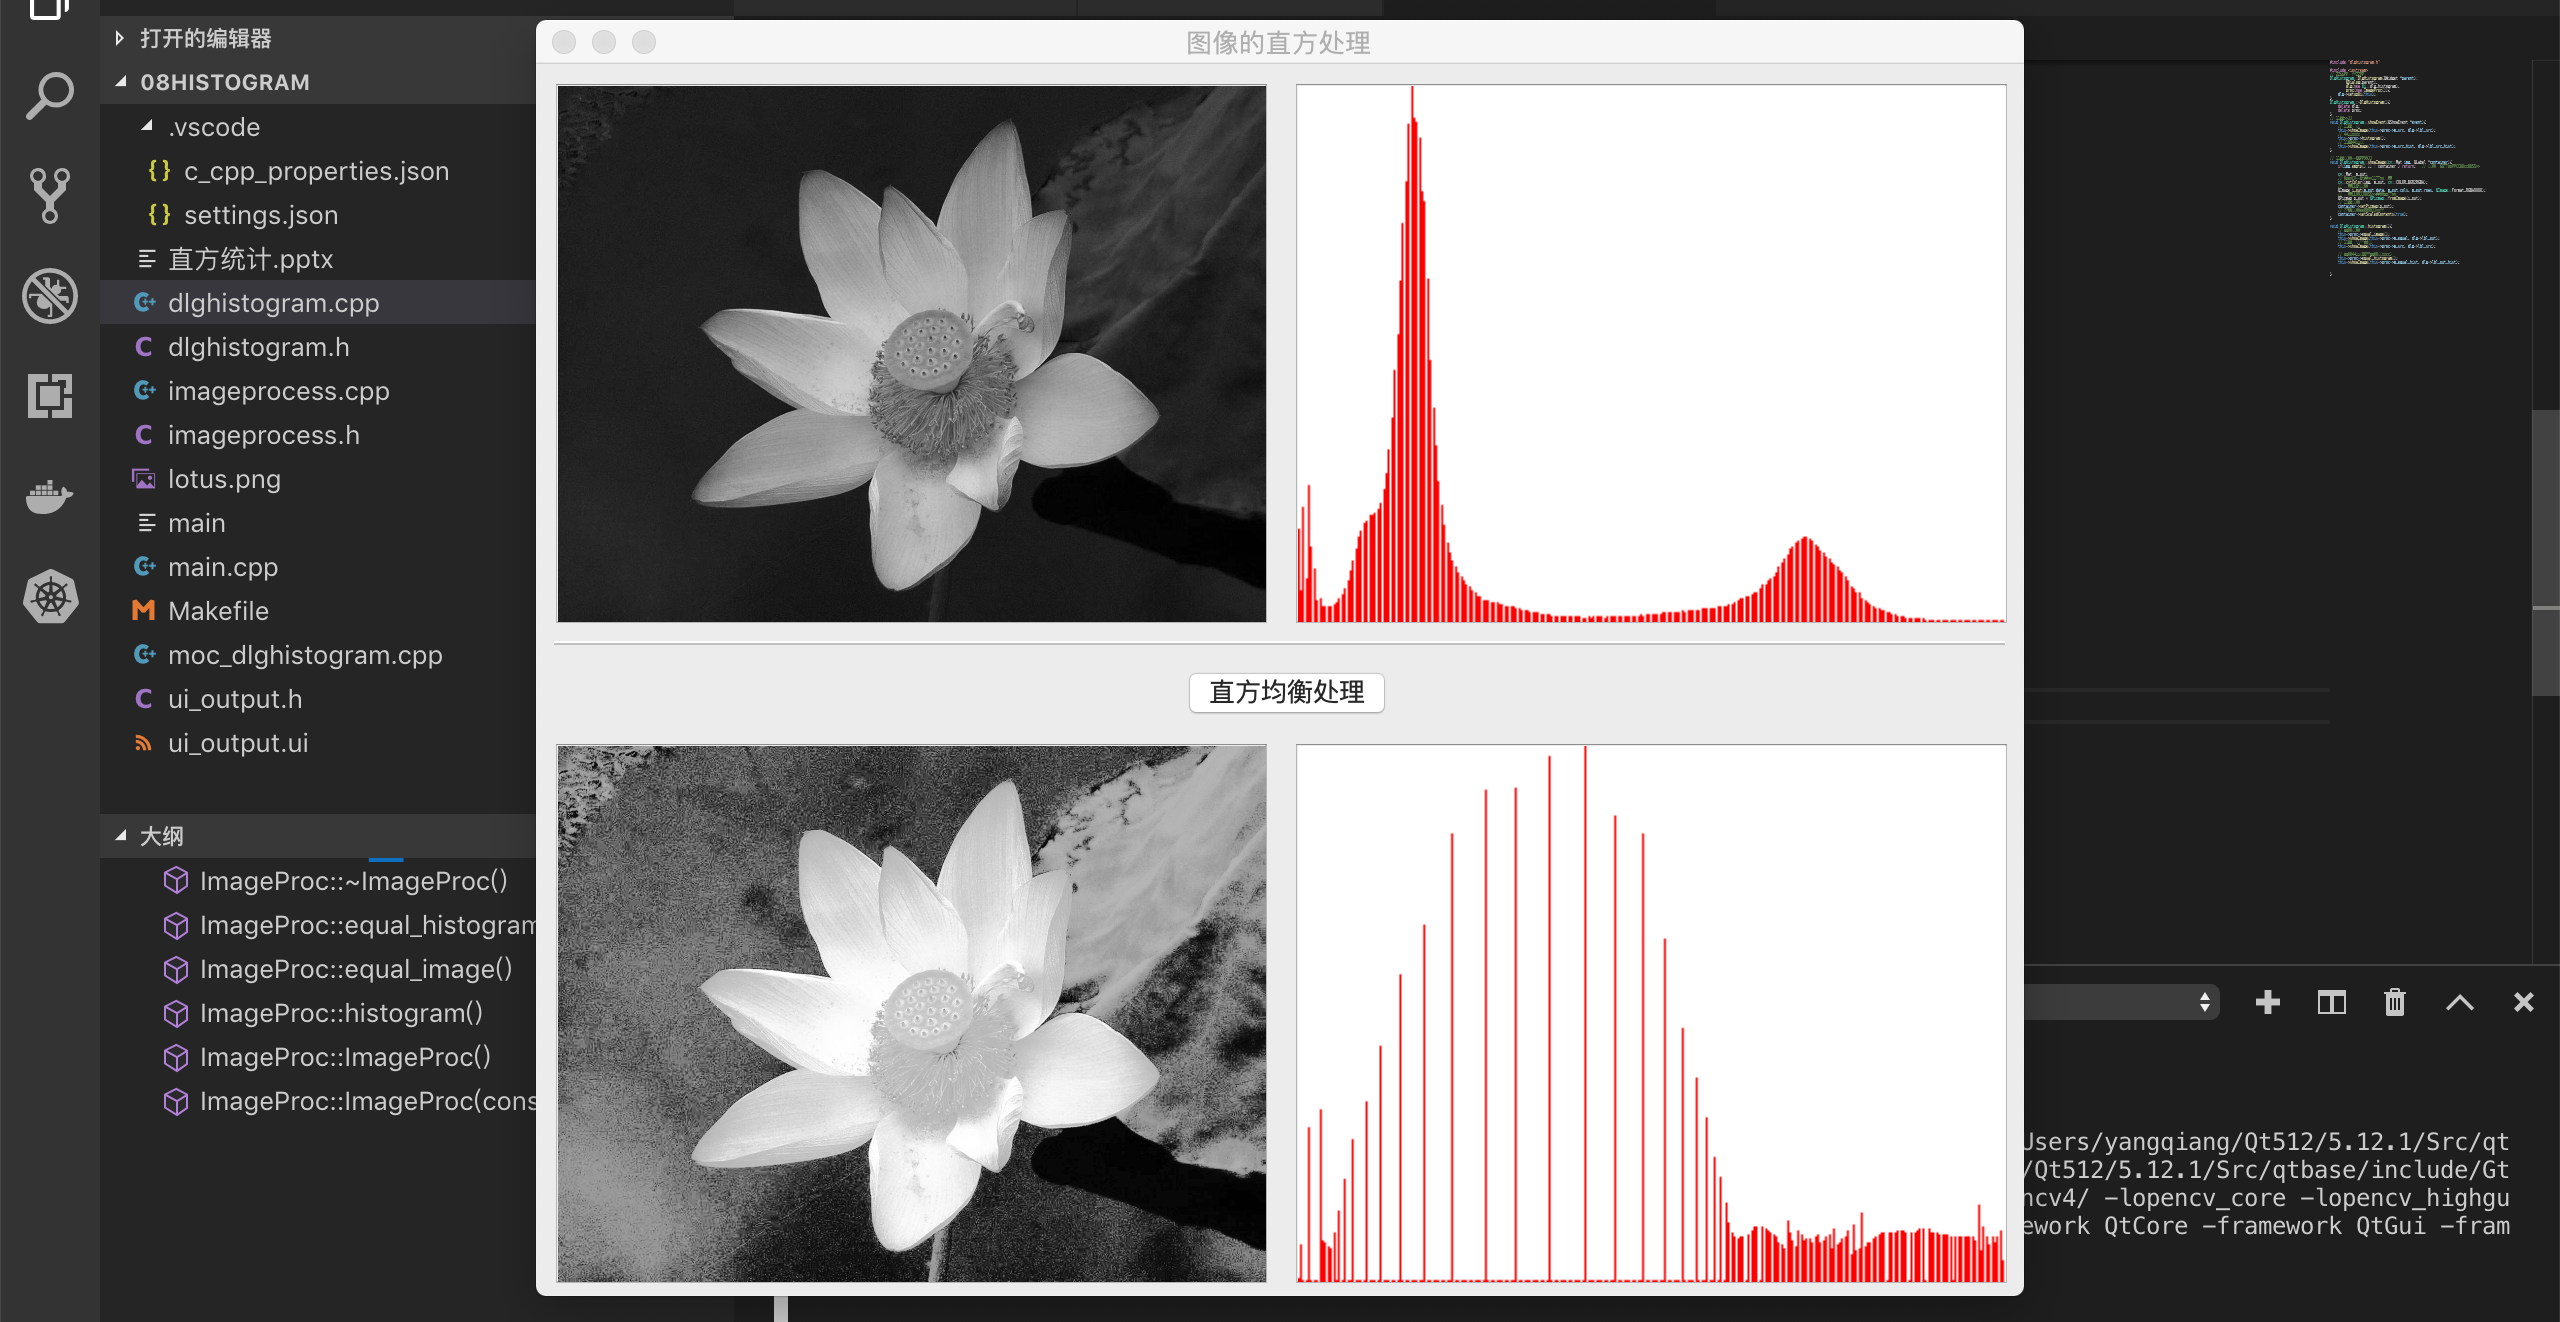

# 直方处理的理论基础

- 本部分的内容与素材取自Rafael C. Gonzalez的（拉斐尔 C. 冈萨雷斯）《数字图像处理》一书。
    - 该书的参考网站：`http://www.imageprocessingplace.com/root_files_V3/faculty/faculty.htm`

## 直方处理的前提

1. 直方处理的经验背景
    1. 像素统计分布-在低端：图像暗；在高端：图像亮；
    2. 像素统计分布-分散：图像对比度高；集中：图像对比度低；

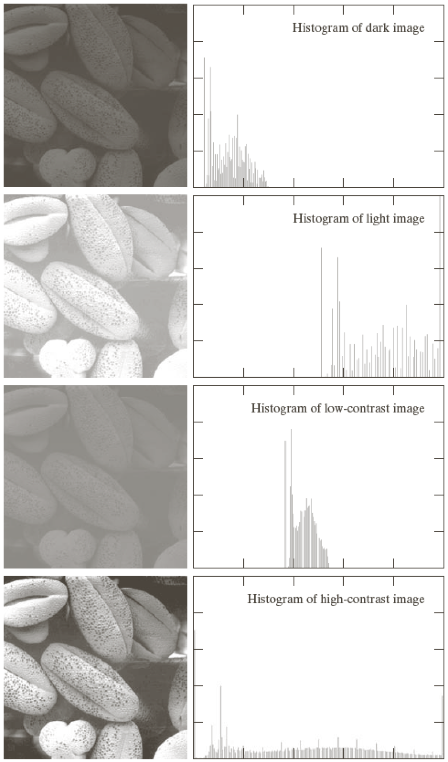

2. 直方处理的目标：
    - 找到一种图像变换方法，使得变换后的图像的像素统计分布分散。

## 直方均衡处理的数学理论基础

1. 图像变换表示
    - $s = T(r)$
        - $r$表示源图像的像素值，$s$表示变换后的像素值。
        - $T$表示我们需要寻找的变换。

2. 图像变换需要满足的几个条件
    - （1）$s = T(r)$必须单调递增函数；
        - 原来像素大，变换后也必须是大的，变换不能影响像素大小的顺序。
    - （2）变换的定义域与值域必须相同：$s \in [ 0, L-1 ], r \in [ 0, L-1 ]$
        - 如果使用字节整数表示颜色灰度，则$L=256$；如果使用小数表示，则$L = 1.0$

3. 直方图的概率意义：概率分布函数
    - 直方统计就是某个灰度值$r$在图像中出现的次数。
    - 如果计算$p(r) = \dfrac{r}{M \times N}$，这可以近似看成$r$在图像中出现的概率；则直方统计就对应灰度图像的概率分布（PDF）。
        - $M, N$表示图像的宽与高。
        
    - 我们可以认为下面两个个概念表示的是同一件事情：
        - 直方统计；
        - 概率分布；
    - 图像可以通过像素的概率分布来判别：亮度与对比度。
        - 分散度比较高的分布：均匀分布；
        - 符合均匀分布的图像应该是对比度最好的图像。

4. 找到一个变换，使得变换后图像符合均匀分布：
    - $s = T(r) = (L-1) \int _0 ^r p_r(w) dw$
        - $p_r$就是上面的$p(r)$源图像的近似概率分布函数；
        - 上述函数$T(r)$是满足我们需要寻找的函数的两个性质的:
            1. 递增。
            2. 值域都在$[0 , L-1]$之间。

5. 变换前后图像的概率函数的累积分布都为1
    - $\int _0 ^ {L-1} p_r(r) dr= \int _0 ^ {L-1} p_s(s) ds = 1$
    - 所以我们可以近似认为微分小量相等：
        - $p_r(r) dr = p_s(s)ds$
        - $p_s(s) = p_r(r) \dfrac{dr}{ds}$
            - 其中$\dfrac{dr}{ds}$考虑取正值，需要取绝对值$|\dfrac{dr}{ds}|$。

6. 计算微分小量的比值：
    - $\dfrac{ds}{dr} = \dfrac{dT(r)}{dr} = (L-1) \dfrac{d}{dr} [\int _0 ^ r p_r(w) dw] = (L-1)p_r(r)$
    
    - 结合第5步的公式，则得到如下结论：
        - $p_s(s) = p_r(r) \dfrac{1}{(L-1)p_r(r)} = \dfrac{1}{L-1}$

7. 结论：
    - 如果使用$T(r) =  (L-1) \int _0 ^r p_r(w) dw$ 作为变换算子，则输出图像的灰度概率分布式均匀分布；
    - 如果使用$T(r)$作为变换算子，则得到的输出图像理论上是亮度增加，对比度也增加。
    - 这就是直方图均衡变换。其中变换函数取决于原始图像的像素分布（或者直方统计），但$p_s(s)$与$p_r(r)$的表现形式无关。

## 直方均衡处理的离散化

- 连续表示：$s = T(r) = (L-1) \int _0 ^r p_r(w) dw$

- 离散表示：$s_k = T(r_k) = (L-1) \sum \limits _ {j=0} ^ k \dfrac{n_j}{MN}$
    - $k = 0, 1, \cdots, L-1$

- 有了离散化表示，实际上算法就比较简单了，就很容易编程实现。

## 彩色图像的均衡化处理

- 对彩色图像的均衡化的最简单方式就是：
    - 颜色的三个通道分别考虑，得到的图像可能会有点失真，但亮度与对比度会增加。
- 如果把彩色看成3维空间，则可以采用3重积分类似的计算。

# 均衡化手工实现

## 灰度图实现

## 彩色图分通道实现

## 彩色图多维实现

----

# 附录

- opencv附加贡献模块下载

    - `https://github.com/opencv/opencv_contrib/releases`

----